### A python notebook to simulate common risk strategies in a simulated market environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Market:
    def __init__(self, steps, up_prob=0.5, point_change=0.01):
        self.up_prob = up_prob
        self.point_change = point_change
        self.current_value = 1.0
        self.steps = steps
        self.history = []

    def simulate_market(self):
        for _ in range(self.steps):
            direction = 1 if np.random.rand() < self.up_prob else -1
            self.current_value += direction * self.point_change
            self.history.append(self.current_value)
        return self.current_value


class Agent:
    def __init__(self, risk_aversion, belief_threshold):
        self.risk_aversion = risk_aversion
        self.belief_threshold = belief_threshold
        self.bought_at = None

    def decide_to_buy(self, market_value, step, total_steps):
        probability_of_up = (total_steps - step) / total_steps
        adjusted_belief = probability_of_up / (1 + self.risk_aversion)

        if adjusted_belief > self.belief_threshold and self.bought_at is None:
            self.bought_at = market_value

    def calculate_final_value(self, final_market_value):
        if self.bought_at is not None:
            return final_market_value / self.bought_at
        return 1


class RiskNeutralAgent(Agent):
    def __init__(self):
        super().__init__(risk_aversion=0.0, belief_threshold=0.5)


class HighRiskAversionAgent(Agent):
    def __init__(self):
        super().__init__(risk_aversion=2.0, belief_threshold=0.7)


class LowRiskAversionAgent(Agent):
    def __init__(self):
        super().__init__(risk_aversion=-0.5, belief_threshold=0.4)


In [3]:
def simulate_agents_in_market(steps=100, up_prob=0.6, point_change=0.01):
    market = Market(steps, up_prob, point_change)
    agents = [RiskNeutralAgent(), HighRiskAversionAgent(), LowRiskAversionAgent()]
    final_market_value = market.simulate_market()
    final_values = {}

    for step, market_value in enumerate(market.history):
        for agent in agents:
            agent.decide_to_buy(market_value, step, steps)

    for agent in agents:
        final_values[agent.__class__.__name__] = agent.calculate_final_value(final_market_value)

    return final_values, market.history


def plot_results(final_values, market_history):
    plt.plot(market_history, label='Market Value')
    for agent_type, value in final_values.items():
        plt.scatter(len(market_history) - 1, value, label=f'{agent_type} Final Value')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.title('Market Value and Final Agent Value')
    plt.legend()
    plt.show()


{'RiskNeutralAgent': 1.1881188118811883, 'HighRiskAversionAgent': 1, 'LowRiskAversionAgent': 1.1881188118811883}


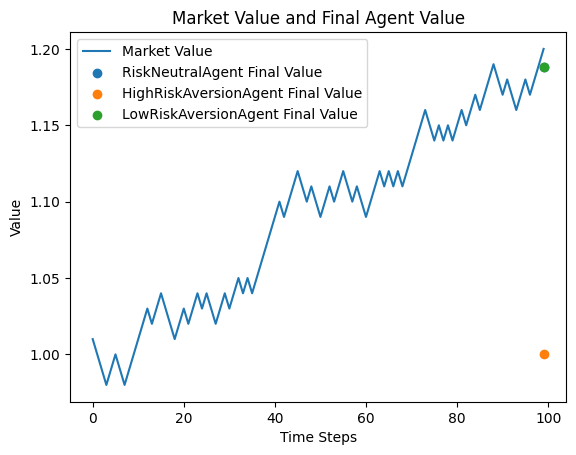

In [4]:
# Run the simulation
final_values, market_history = simulate_agents_in_market()
print(final_values)
plot_results(final_values, market_history)